In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set()
%matplotlib inline
np.random.seed(123)

In [2]:
train_data = pd.read_csv(os.path.join('data', 'train_values.csv'), index_col='patient_id')
train_target = pd.read_csv(os.path.join('data', 'train_labels.csv'), index_col='patient_id')
test_data = pd.read_csv(os.path.join('data', 'test_values.csv'), index_col='patient_id')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 0z64un to 2nx10r
Data columns (total 13 columns):
slope_of_peak_exercise_st_segment       180 non-null int64
thal                                    180 non-null object
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null int64
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null int64
age                                     180 non-null int64
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
dtypes: float64(1), int64(11), object(1)
memory usage: 19.7+ KB


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, olalu7 to aeiv0y
Data columns (total 13 columns):
slope_of_peak_exercise_st_segment       90 non-null int64
thal                                    90 non-null object
resting_blood_pressure                  90 non-null int64
chest_pain_type                         90 non-null int64
num_major_vessels                       90 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    90 non-null int64
resting_ekg_results                     90 non-null int64
serum_cholesterol_mg_per_dl             90 non-null int64
oldpeak_eq_st_depression                90 non-null float64
sex                                     90 non-null int64
age                                     90 non-null int64
max_heart_rate_achieved                 90 non-null int64
exercise_induced_angina                 90 non-null int64
dtypes: float64(1), int64(11), object(1)
memory usage: 9.8+ KB


In [5]:
train_data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
patient_id,,,,,,,,,,,,,
0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [6]:
train_target.head()

,heart_disease_present
patient_id,
0z64un,0
ryoo3j,0
yt1s1x,1
l2xjde,1
oyt4ek,0


In [7]:
train = train_data.join(train_target)
train.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
patient_id,,,,,,,,,,,,,,
0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [8]:
train.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [9]:
train.fasting_blood_sugar_gt_120_mg_per_dl.value_counts()

0    151
1     29
Name: fasting_blood_sugar_gt_120_mg_per_dl, dtype: int64

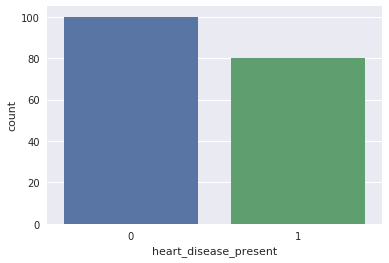

In [10]:
sns.countplot(train['heart_disease_present']);

# missing values

In [11]:
np.sum(train_data.isnull())

slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
dtype: int64

In [12]:
np.sum(test_data.isnull())

slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
dtype: int64

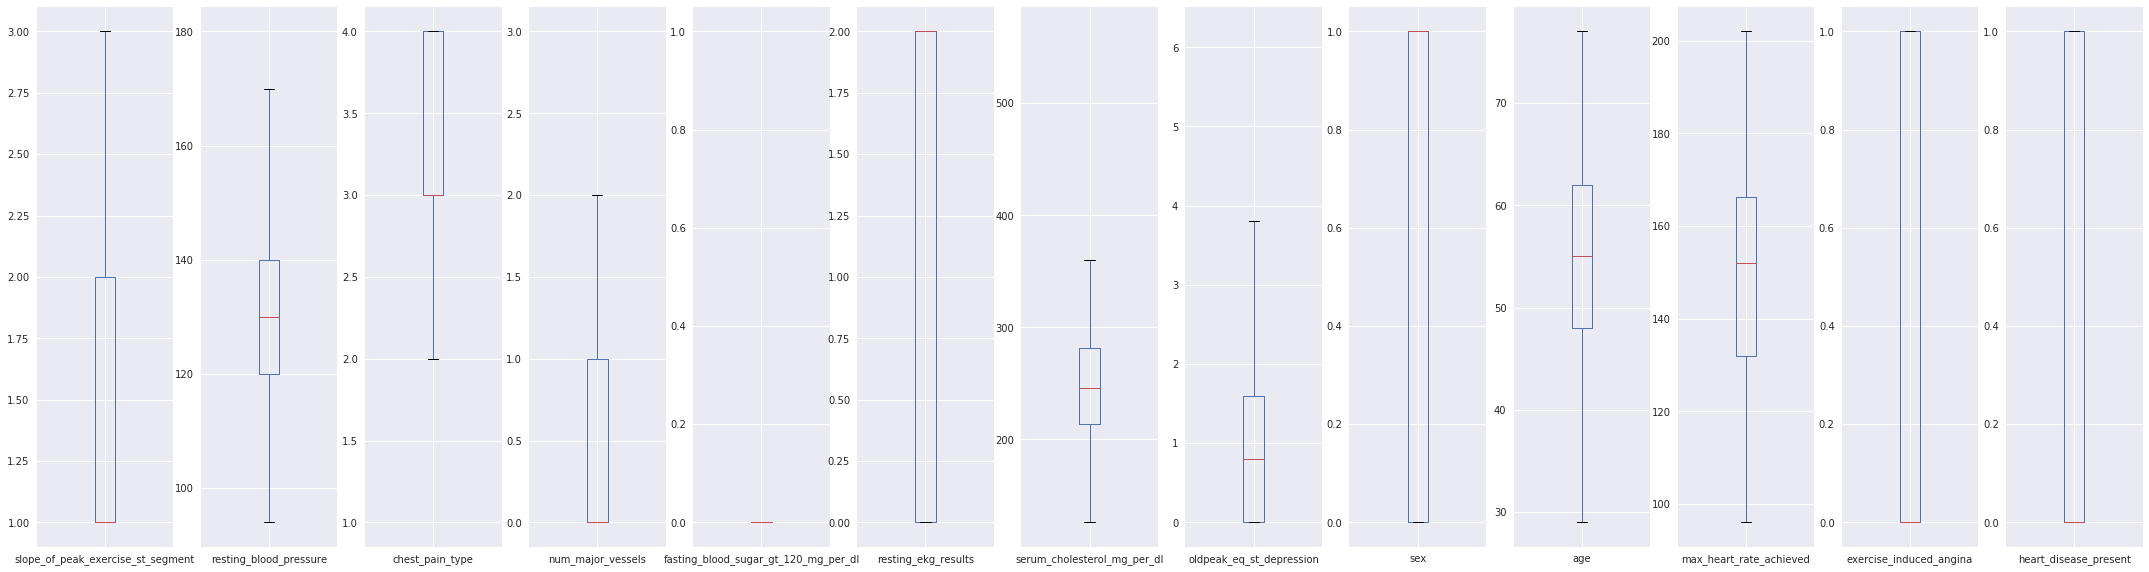

In [13]:
train.plot(kind='box', subplots=True);
plt.subplots_adjust(right=5, top=2)

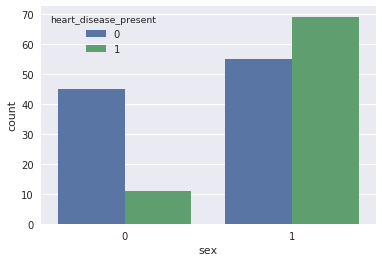

In [14]:
sns.countplot(data=train, x='sex', hue='heart_disease_present');

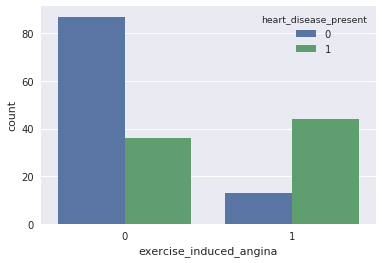

In [15]:
sns.countplot(data=train, x='exercise_induced_angina', hue='heart_disease_present');

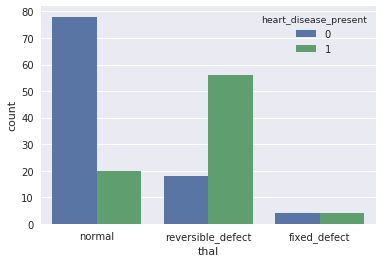

In [16]:
sns.countplot(data=train, x='thal', hue='heart_disease_present');

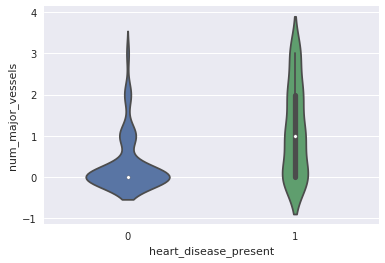

In [17]:
sns.violinplot(x="heart_disease_present", y="num_major_vessels", data=train, width=0.5);

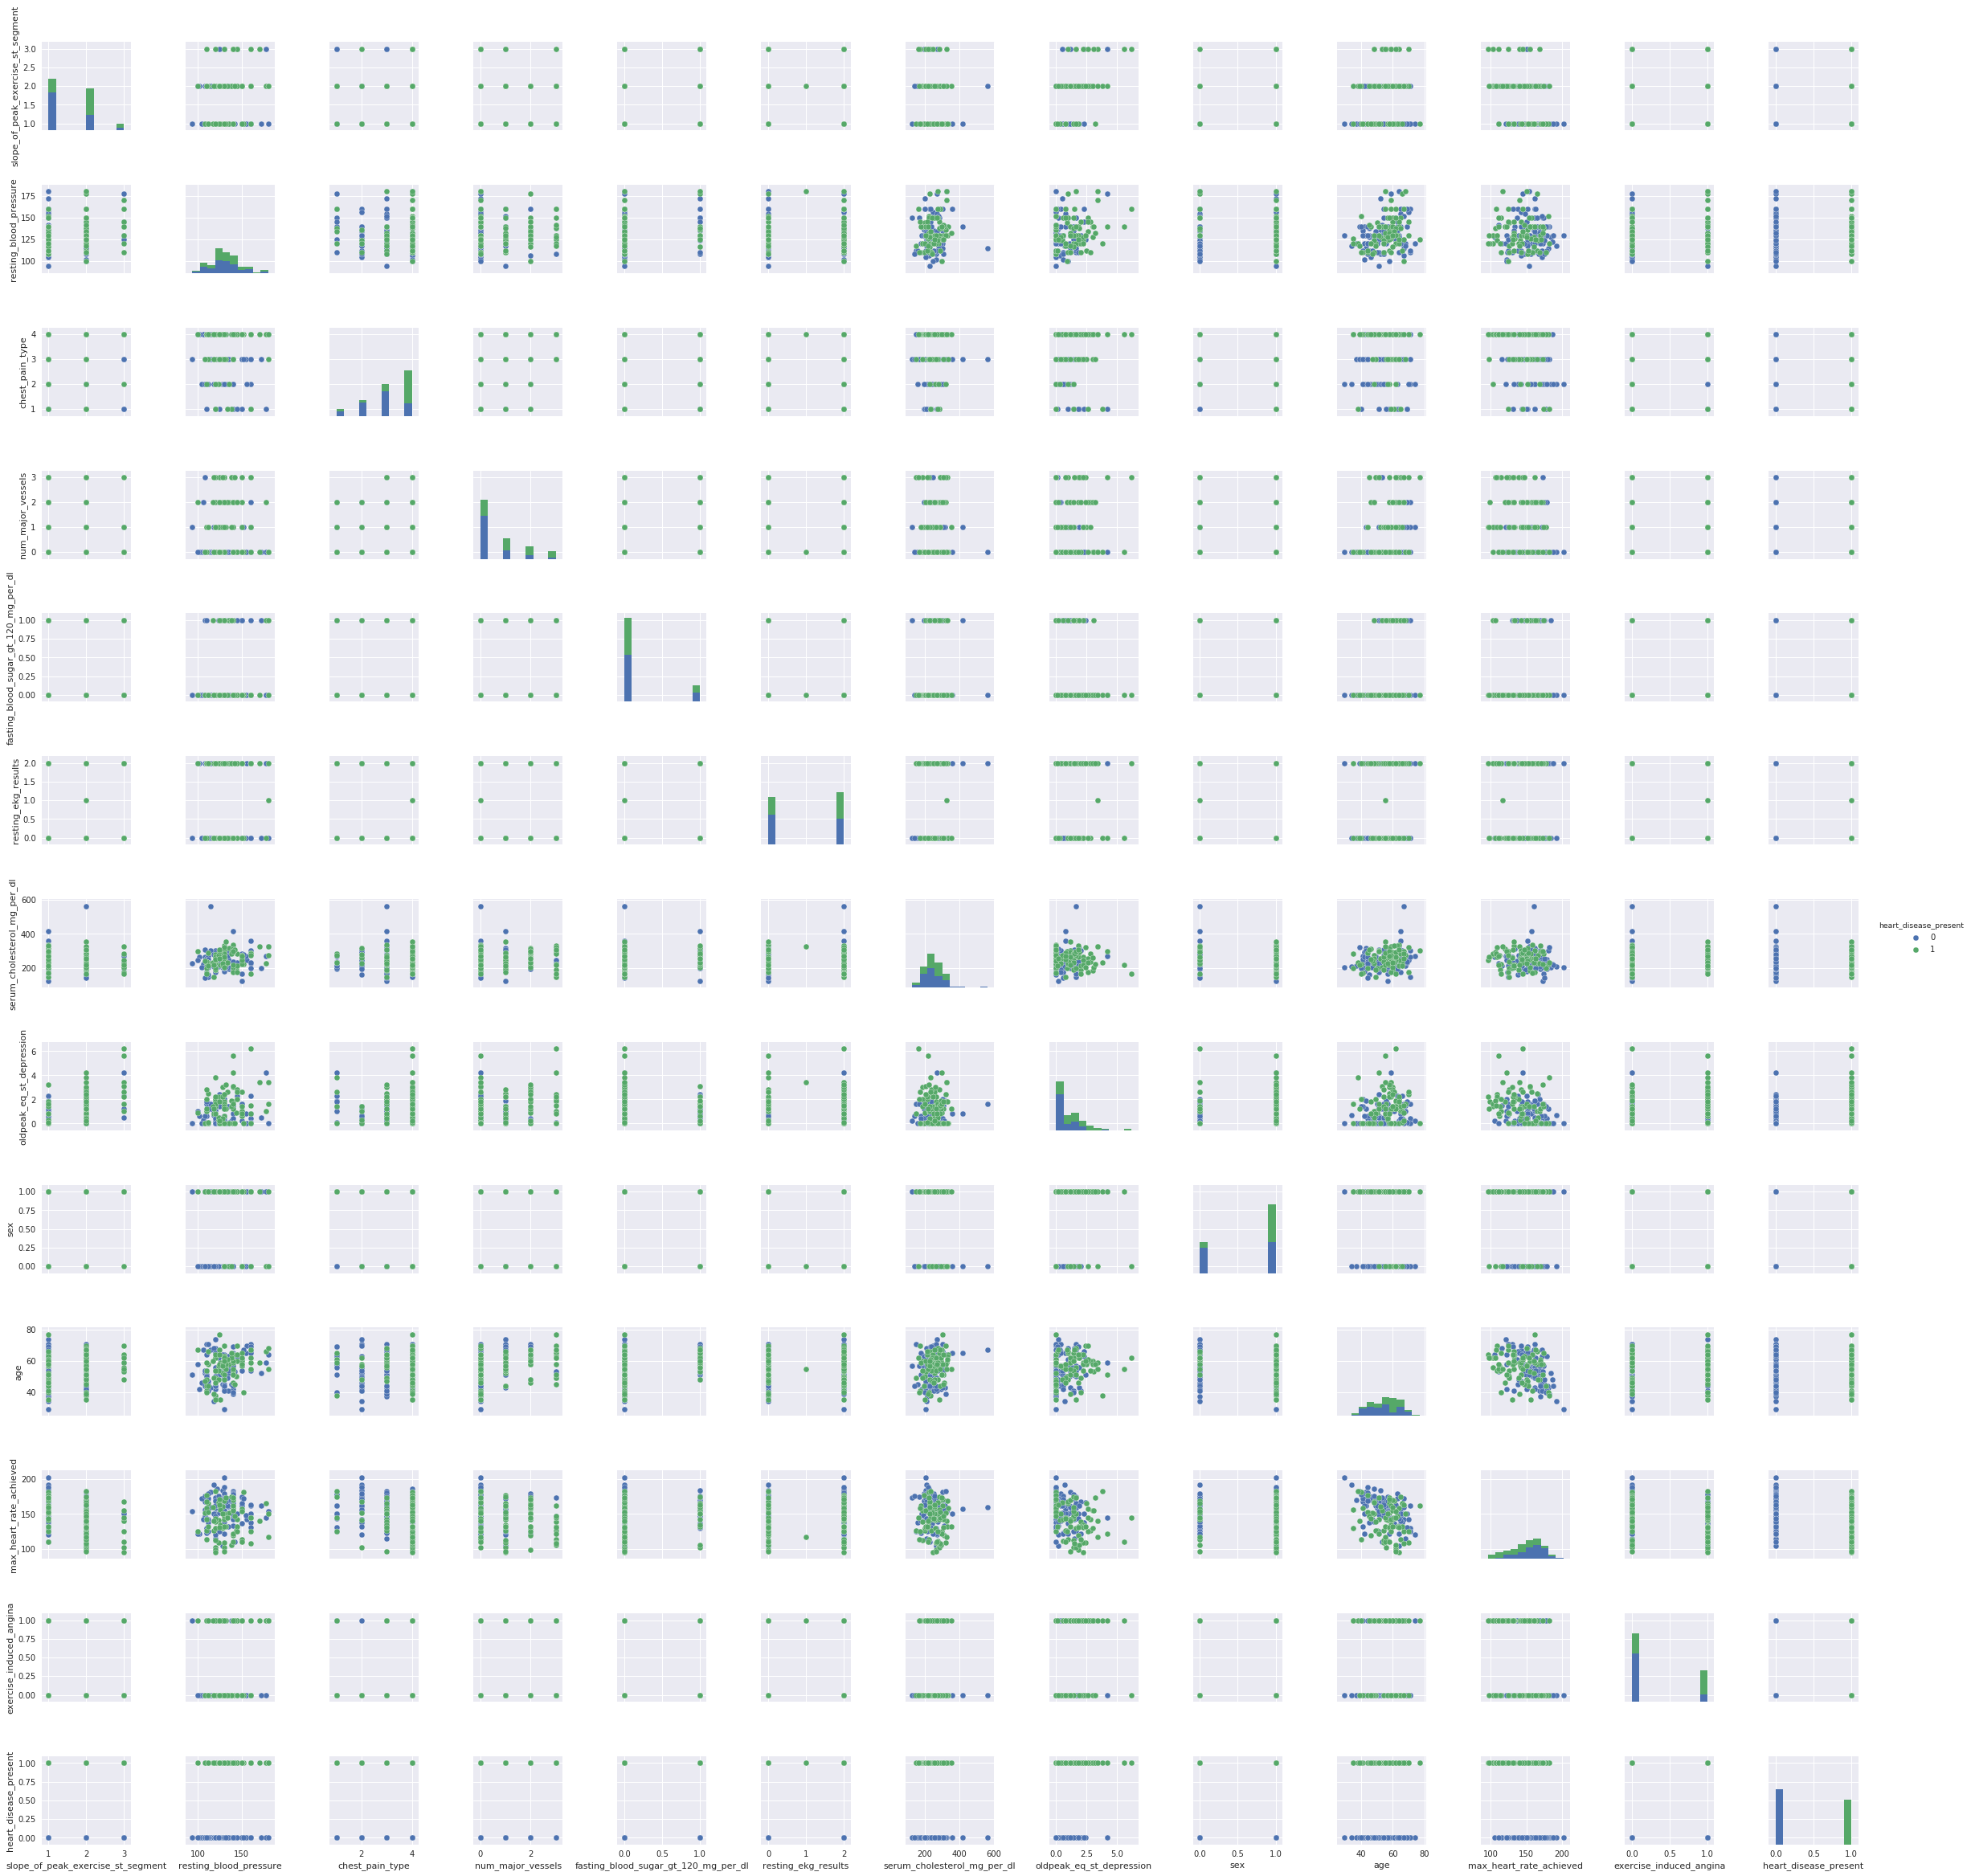

In [18]:
sns.pairplot(train, hue='heart_disease_present')

/home/ariel/venv/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


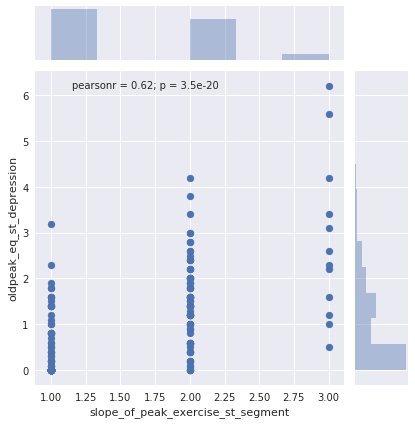

In [19]:
sns.jointplot('slope_of_peak_exercise_st_segment', 'oldpeak_eq_st_depression', data=train);

/home/ariel/venv/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


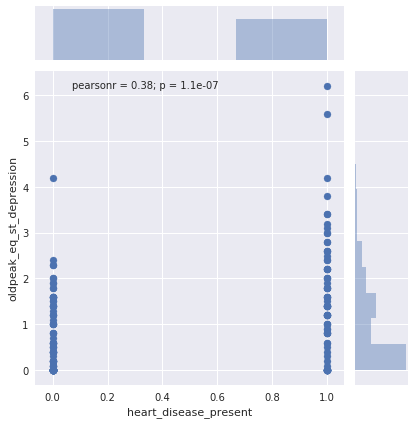

In [20]:
# sns.distplot(train['oldpeak_eq_st_depression'])
sns.jointplot('heart_disease_present', 'oldpeak_eq_st_depression', data=train);

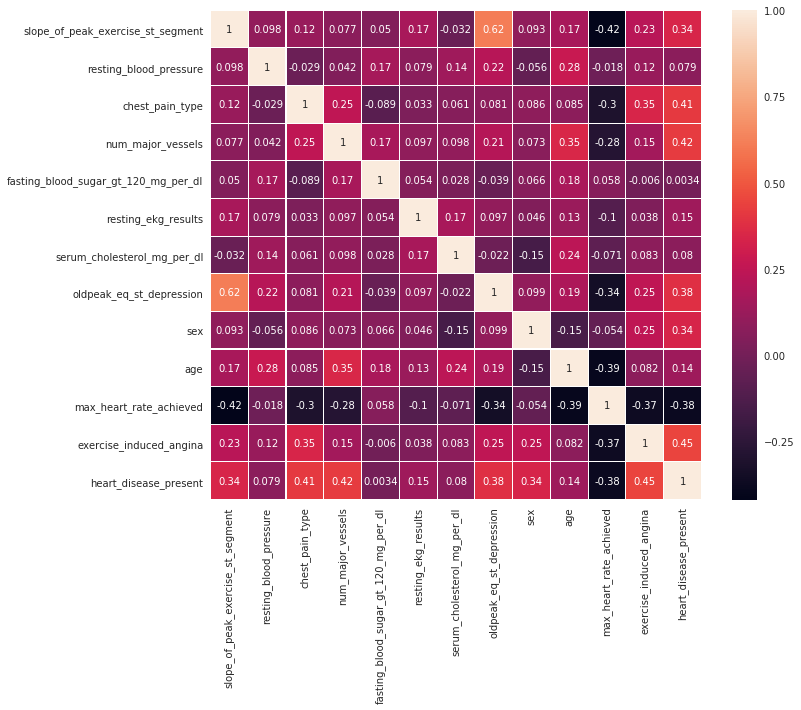

In [21]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(train.corr(), annot=True, linewidths=.1);

/home/ariel/venv/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


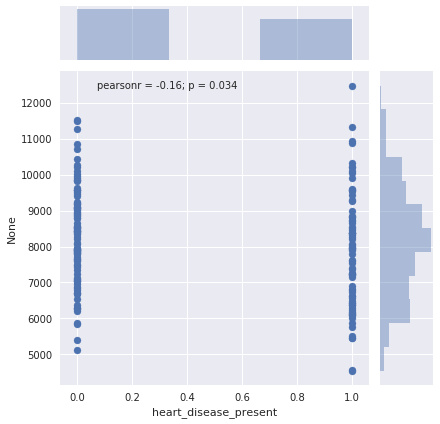

In [41]:
sns.jointplot(y=train.max_heart_rate_achieved * train.age, x=train.heart_disease_present)

# Train Vs Test

In [ ]:
from sklearn.manifold import TSNE
TSNE_model = Pipeline([
    ('dummies', category_encoders.OneHotEncoder(cols=['thal'])),
    ('log', FunctionTransformer(np.log1p, validate=False)),
    ('TSNE', TSNE(random_state=222))
])
x_data_tsne = TSNE_model.fit_transform(train)
real_test_tsne = TSNE_model.fit_transform(test_data)

plt.scatter(x_data_tsne[:, 0], x_data_tsne[:, 1]);
plt.scatter(real_test_tsne[:, 0], real_test_tsne[:, 1], edgecolors='r', c='None');

In [ ]:
plt.scatter(x_data_tsne[train.heart_disease_present == 1, 0], x_data_tsne[train.heart_disease_present == 1, 1]);
plt.scatter(x_data_tsne[train.heart_disease_present == 0, 0], x_data_tsne[train.heart_disease_present == 0, 1]);

In [ ]:
from sklearn.decomposition import PCA
PCA_model = Pipeline([
    ('dummies', category_encoders.OneHotEncoder(cols=['thal'])),
    ('log', FunctionTransformer(np.log1p, validate=False)),
    ('PCA', PCA(n_components=2))
])
x_data_pca = PCA_model.fit_transform(train)

plt.scatter(x_data_pca[train.heart_disease_present == 1, 0], x_data_pca[train.heart_disease_present == 1, 1]);
plt.scatter(x_data_pca[train.heart_disease_present == 0, 0], x_data_pca[train.heart_disease_present == 0, 1]);

In [42]:
def brute_force_featuremaker(data):
    df = data.copy()
    for col in df.columns:
        df['log_{}'.format(col)] = np.lop1p(df[col])
        df['sqrt_{}'.format(col)] = np.sqrt(df[col])
#         df['power_{}'.format(col)] = np.power(df[col], 2)
        for col2 in df.columns:
            df['{}_dev_{}'.format(col, col2)] = df[col] / df[col2]
            df['{}_product_{}'.format(col, col2)] = df[col] * df[col2]
            df['log_{}_dev_{}'.format(col, col2)] = np.lop1p(df['{}_dev_{}'.format(col, col2)])

# 	Benchmark: Logistic Regression: 0.5381 on test

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import category_encoders
from sklearn import metrics
from sklearn.svm import SVC
import datetime
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import xgboost as xgb

In [ ]:
import multiprocessing
def model_run(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    train_Ypred = model.predict_proba(X_train)
    test_Ypred = model.predict_proba(X_test)
    
    logloss_train = metrics.log_loss(y_train, train_Ypred)
    logloss_test = metrics.log_loss(y_test, test_Ypred)

    return logloss_train, logloss_test

def test_on_train(model, train_data, y):
    input_to_multi = []
    start = datetime.datetime.now()
    for train_index, test_index in StratifiedKFold(n_splits=5).split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        input_to_multi.append([model, X_train, X_test, y_train, y_test])

    with multiprocessing.Pool() as p:
        KFold_results = p.starmap(model_run, input_to_multi)


    print(datetime.datetime.now() - start)
    return pd.DataFrame(KFold_results, columns=['logloss_train', 'logloss_test']).mean(axis=0)

In [ ]:
from scipy import stats
def log_transform_skewed(data):
    skew_value = 0.7
    X = data.copy()
    skewed_feats = X.apply(stats.skew) #compute skewness
    skewed_feats = skewed_feats[skewed_feats > abs(skew_value)]
    skewed_feats = skewed_feats.index

    X[skewed_feats] = np.log1p(X[skewed_feats])
    return X

In [ ]:
neg_pos = np.sum(train['heart_disease_present'] == 0) / np.sum(train['heart_disease_present'] == 1)
neg_pos

In [ ]:
np.random.seed(123)
X = train.drop('heart_disease_present', axis=1)
y = train['heart_disease_present']
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [ ]:
np.random.seed(123)
model = Pipeline([
    ('categ', category_encoders.OneHotEncoder(cols=['thal'])),
    ('log', FunctionTransformer(np.log1p, validate=False)),
    ('PCA', PCA(n_components=7)),
#     ('log', FunctionTransformer(log_transform_skewed, validate=False)),
    ('logreg', LogisticRegression(penalty='l2', dual=False, C=1.0, solver='liblinear', max_iter=1000))
#     ('svm', SVC(probability=True, gamma=0.36, C=0.1, kernel='rbf'))
#     ('voting', VotingClassifier(estimators=[
#         ('logreg', LogisticRegression()),
#         ('svm', SVC(probability=True,))
#     ], voting='soft'))
#     ('knn', KNeighborsClassifier(n_neighbors=28, p=2, weights='distance'))
#     ('xgb', xgb.XGBClassifier(max_depth=1, learning_rate=0.1, n_estimators=100,
#                               objective='binary:logistic', booster='gblinear', n_jobs=1,
#                               nthread=None, gamma=0, min_child_weight=1, max_delta_step=0,
#                               subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0.1,
#                               reg_lambda=0.7, scale_pos_weight=neg_pos))
])
test_on_train(model, X, y) 

In [ ]:
p_grid = {
#     'svm__C':np.arange(0.1, 2.5, 0.1),
#     'svm__gamma':np.arange(0.01, 0.5, 0.05) ,
#     'svm__kernel':['linear', 'poly', 'rbf', 'sigmoid']
#     'logreg__C':np.arange(0.01, 0.2, 0.05),
#     'logreg__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    'PCA__n_components':np.arange(1, 17)
#     'knn__n_neighbors':np.arange(20, 40, 1), #50, 31, 28
#     'knn__p':[1, 2],
#     'knn__weights':['uniform', 'distance']
         }
GCV = GridSearchCV(model, param_grid=p_grid, cv=5, n_jobs=4, verbose=2, scoring='neg_log_loss')
GCV.fit(X, y)

In [ ]:
GCV.best_score_, GCV.best_params_

# # # Xgboost GridSearch

In [ ]:
p_grid = {'xgb__objective':['binary:logistic', 'reg:logistic', 'reg:linear', 'binary:logitraw'],
         'xgb__max_depth':np.arange(1, 5),
         'xgb__booster':['gbtree', 'gblinear', 'dart'],
#          'xgb__colsample_bytree':np.arange(0.1, 1, 0.2),
#           'xgb__colsample_bylevel':np.arange(0.1, 1, 0.2),
          'xgb__reg_alpha':np.arange(0.1, 1, 0.2),
          'xgb__reg_lambda':np.arange(0.1, 1, 0.2)
         }
GCV = GridSearchCV(model, param_grid=p_grid, cv=5, n_jobs=4, verbose=2, scoring='neg_log_loss')
GCV.fit(X, y)
GCV.best_params_, GCV.best_score_

In [ ]:
p_grid = {'voting__logreg__penalty':['l1', 'l2'],
         'voting__logreg__C':np.arange(0.1, 10, 0.3),
         'voting__svm__C':np.arange(0.1, 10, 0.3),
         'voting__svm__gamma':np.arange(0.1, 10, 0.5)
         }
GCV = GridSearchCV(model, param_grid=p_grid, cv=5, n_jobs=4, verbose=2, scoring='neg_log_loss')
GCV.fit(X, y)

In [ ]:
GCV.best_params_, GCV.best_score_

# Predict on test

In [ ]:
model.fit(X, y)
test_pred = model.predict_proba(test_data)

In [ ]:
submit = pd.DataFrame(list(zip(test_data.index, test_pred[:, 1])),
                      columns=['patient_id', 'heart_disease_present'])
submit.to_csv('sub.csv', index_label='patient_id', index=False)
submit.head()